In [6]:
import ExonExonData as eed
import pathlib
cwd = pathlib.Path.cwd()
import pandas
import pickle
from Heatmaps import heatmapv2 as heatmap
from Heatmaps import _undigitize_seq as undigit
from TimeEmbedding import time_embedding_1D as te_1d
from ExonExonPlots import plots_v2
from TimeEmbedding import time_embedding_v2
from TimeEmbedding import matplotfigure
from TimeEmbedding import time_embedding
from TimeEmbedding import time_embedding_1D
import matplotlib.pyplot as plt
import re

In [7]:
def figure_maker(data: pandas.DataFrame, inches = 10, dot_size = 0.1):
    '''
    '''
    
    fig, ax = plt.subplots()
    fig.set_size_inches(inches, inches)
        # ax.scatter(points[:, 0], points[:, 1], s = dot_size, marker = "s", color = "k", linewidths = 0)
    plt.plot(data.loc[:, "X"], data.loc[:, "Y"], markersize = dot_size, marker = "s", linestyle = "", color = "k")
    # plt.title(title)
    # plt.xlabel(x_title)
    # plt.ylabel(y_title)
        
    # if isinstance(x_tick_marks, dict):
    #     ax.set_xticks(list(x_tick_marks.keys()))
    #     ax.set_xticklabels(list(x_tick_marks.values()))
    # if isinstance(y_tick_marks, dict):
    #     ax.set_yticks(list(y_tick_marks.keys()))
    #     ax.set_yticklabels(list(y_tick_marks.values()))

    # axes = ax.axes.flat

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0)

    # if (file_extension in ".png") or (file_extension in ".pdf"):
    #     plt.savefig(f"{file}")
    # elif file_extension in ".pkl":
    #     pickle.dump(fig, open(f"{file}", "wb"))

    # print(f"Output image to {file}")
    # plt.close()
    plt.show()

In [8]:
normal_data = cwd.parent / "Data_Files" / "Primates" / "Genetics" / "Homo_Sapiens" / "G_Data" / "Normal_Exon2Exon.xlsx"
normal_data = pandas.read_excel(normal_data, sheet_name="sheet1")

normal_data["Posterior"] = normal_data["Posterior_20"].apply(lambda x: x[len(x) - 6: len(x)])
normal_data["Anterior"] = normal_data["Anterior_20"].apply(lambda x: x[0: 6])
normal_data["Seq"] = normal_data["Posterior"] + normal_data["Anterior"]
normal_data["Classificaion"] = "exon"

print(normal_data.head())

             Name  Chrm Strand          Posterior_20           Anterior_20  \
0  NM_001375617.1  chr1      +  TCAGTGTGGAGGAGACTGAG  TATTCTACCTTGTAAATACT   
1  NM_001375617.1  chr1      +  AGCACAAGCAGCGGCCACAG  GCCACTGCAGAACAAATTAG   
2  NM_001375617.1  chr1      +  TTGAGGAGAAGGTGAAACAA  TTGATTGATATTACAGGCAA   
3  NM_001375617.1  chr1      +  TGGAAGGAAACCCAGACACG  CATTCCTGGGAGATGGTCGG   
4  NM_001375617.1  chr1      +  TTTATCAAAACCAGCTGTGG  TTCGAGGTCAGGAAAATGGA   

  Posterior Anterior           Seq Classificaion  
0    ACTGAG   TATTCT  ACTGAGTATTCT          exon  
1    CCACAG   GCCACT  CCACAGGCCACT          exon  
2    AAACAA   TTGATT  AAACAATTGATT          exon  
3    GACACG   CATTCC  GACACGCATTCC          exon  
4    CTGTGG   TTCGAG  CTGTGGTTCGAG          exon  


In [9]:
cancer_data = cwd.parent / "Data_Files" / "UTData_fs.pkl"
cancer_data: pandas.DataFrame = pandas.read_pickle(cancer_data)

cancer_data["HType"] = cancer_data["Head"].apply(lambda x: type(x)).astype(str)  # "<class 'str'>" or "<class 'float'>"
cancer_data["TType"] = cancer_data["Tail"].apply(lambda x: type(x)).astype(str)

cancer_data = cancer_data[(cancer_data["HType"] == "<class 'str'>") & (cancer_data["TType"] == "<class 'str'>")]
cancer_data = cancer_data.reset_index()

cancer_data["HLen"] = cancer_data["Head"].apply(lambda x: len(x))  # you know if I actually looked at the data I think I could have avoided this chunk
cancer_data["TLen"] = cancer_data["Tail"].apply(lambda x: len(x))
cancer_data = cancer_data[(cancer_data["HLen"] > 0) & (cancer_data["TLen"] > 0)]
cancer_data = cancer_data.reset_index()

cancer_data["Posterior"] = cancer_data["Head"].apply(lambda x: x[len(x) - 6: len(x)])
cancer_data["Anterior"] = cancer_data["Tail"].apply(lambda x: x[0: 6])
cancer_data["Seq"] = cancer_data["Posterior"] + cancer_data["Anterior"]
cancer_data["SLen"] = cancer_data["Seq"].apply(lambda x: len(x))
cancer_data = cancer_data[cancer_data["SLen"] > 11]
# cancer_data = cancer_data.reset_index()
cancer_data["Classificaion"] = "exon"

# print(cancer_data.head())
print(cancer_data["Seq"].head())
# print(cancer_data.columns)
# print(cancer_data["TType"].unique())

0    CCTCAGGGAGTA
1    CCTCAGGGAGTA
2    AAAAAGTTCTCT
3    AAAAAGTTCTCT
4    AAAAAGTTCTCT
Name: Seq, dtype: object


In [10]:
lab_data = cwd.parent / "Data_Files" / "Fullfusionlist.pkl"
lab_data: pandas.DataFrame = pandas.read_pickle(lab_data)

# print(lab_data.head())
lab_data["Posterior"] = lab_data["Head"].apply(lambda x: x[len(x) - 6: len(x)])
lab_data["Anterior"] = lab_data["Tail"].apply(lambda x: x[0: 6])
lab_data["Posterior"] = lab_data["Posterior"].apply(lambda x: pandas.NA if re.search(r"(\_|\?|\.)", x) else x)
lab_data["Anterior"] = lab_data["Anterior"].apply(lambda x: pandas.NA if re.search(r"(\_|\?|\.)", x) else x)

lab_data = lab_data.dropna()
lab_data = lab_data.reset_index()
lab_data["Seq"] = lab_data["Posterior"] + lab_data["Anterior"]
lab_data["SLen"] = lab_data["Seq"].apply(lambda x: len(x))

lab_data = lab_data[lab_data["SLen"] > 11]

lab_data["Classificaion"] = "exon"


In [11]:
print(normal_data.head())

             Name  Chrm Strand          Posterior_20           Anterior_20  \
0  NM_001375617.1  chr1      +  TCAGTGTGGAGGAGACTGAG  TATTCTACCTTGTAAATACT   
1  NM_001375617.1  chr1      +  AGCACAAGCAGCGGCCACAG  GCCACTGCAGAACAAATTAG   
2  NM_001375617.1  chr1      +  TTGAGGAGAAGGTGAAACAA  TTGATTGATATTACAGGCAA   
3  NM_001375617.1  chr1      +  TGGAAGGAAACCCAGACACG  CATTCCTGGGAGATGGTCGG   
4  NM_001375617.1  chr1      +  TTTATCAAAACCAGCTGTGG  TTCGAGGTCAGGAAAATGGA   

  Posterior Anterior           Seq Classificaion  
0    ACTGAG   TATTCT  ACTGAGTATTCT          exon  
1    CCACAG   GCCACT  CCACAGGCCACT          exon  
2    AAACAA   TTGATT  AAACAATTGATT          exon  
3    GACACG   CATTCC  GACACGCATTCC          exon  
4    CTGTGG   TTCGAG  CTGTGGTTCGAG          exon  


In [12]:
print(cancer_data.head())

   level_0  index            Henst            Tenst DataType Source Ctype  \
0        0      0  ENST00000370243  ENST00000370225     TCGA     RV  UCEC   
1        1      1  ENST00000370247  ENST00000370225     TCGA     RV  UCEC   
2        2      2  ENST00000379446  ENST00000340645     TCGA     RV  UCEC   
3        3      3  ENST00000379446  ENST00000393667     TCGA     RV  UCEC   
4        4      4  ENST00000379433  ENST00000340645     TCGA     RV  UCEC   

   Hgene  Hchr         Hbp  ...           Unnamed: 18           Unnamed: 19  \
0  BCAR3  chr1  94054534.0  ...  CCCAGGGGAAACCTCCTCAG  GGAGTACCCCTGTGGCAACT   
1  BCAR3  chr1  94054534.0  ...  CCCAGGGGAAACCTCCTCAG  GGAGTACCCCTGTGGCAACT   
2  NEDD9  chr6  11213514.0  ...  GGCCCCACGTGGGTAAAAAG  TTCTCTCAGCTACTGGAAGA   
3  NEDD9  chr6  11213514.0  ...  GGCCCCACGTGGGTAAAAAG  TTCTCTCAGCTACTGGAAGA   
4  NEDD9  chr6  11213514.0  ...  GGCCCCACGTGGGTAAAAAG  TTCTCTCAGCTACTGGAAGA   

           HType          TType  HLen  TLen Posterior Anterior

In [13]:
print(lab_data.head())

   level_0  index CANCER TYPE Shipment Number   XS_MODEL   #gene1  \
0        0      0          BR      Shipment_1    ST3105B     EEF2   
1        1      1          LU      Shipment_1  ST4230EDR    FGFR3   
2        2      2       DM-ML      Shipment_3     ST052C    FGF19   
3        3      3          BR      Shipment_1    ST3105C     EEF2   
4        4      4          BN      Shipment_2     ST5344  HNRNPH1   

                        gene2 strand1(gene/fusion) strand2(gene/fusion)  \
0     CLSPN(36767),AGO4(1271)                  -/-                  ./+   
1                       TACC3                  +/+                  +/+   
2  DNAJB6P5(25218),FGF4(7787)                  -/-                  ./+   
3     CLSPN(36767),AGO4(1271)                  -/-                  ./+   
4                       PILRA                  -/-                  +/+   

   breakpoint1  ...                                  fusion_transcript  \
0   19:3979329  ...  CCAAGAACCCGGCTGACCTGCCCAAGCTGGTGGAGGGGC

In [14]:
normal_data["X"] = normal_data["Anterior"].apply(lambda x: time_embedding_1D(x)[0])
print(normal_data["X"].head())

0     [0.54248046875]
1     [0.48779296875]
2     [0.64306640625]
3    [0.792724609375]
4    [0.676025390625]
Name: X, dtype: object


In [15]:
normal_data["Y"] = normal_data["Posterior"].apply(lambda x: time_embedding_1D(x, w_backwards = True)[0])
print(normal_data["Y"].head())

0      [0.2763671875]
1    [0.300537109375]
2          [0.046875]
3    [0.449462890625]
4    [0.350341796875]
Name: Y, dtype: object


In [16]:
cancer_data["X"] = cancer_data["Anterior"].apply(lambda x: time_embedding_1D(x)[0])
print(cancer_data["X"].head())

0      [0.318359375]
1      [0.318359375]
2    [0.68310546875]
3    [0.68310546875]
4    [0.68310546875]
Name: X, dtype: object


In [17]:
cancer_data["Y"] = cancer_data["Posterior"].apply(lambda x: time_embedding_1D(x, w_backwards = True)[0])

print(cancer_data["Y"].head())

0    [0.308349609375]
1    [0.308349609375]
2              [0.25]
3              [0.25]
4              [0.25]
Name: Y, dtype: object


In [18]:
lab_data["X"] = lab_data["Anterior"].apply(lambda x: time_embedding_1D(x)[0])
print(lab_data["X"].head())

0    [0.306396484375]
1        [0.05078125]
2    [0.124267578125]
3    [0.306396484375]
4    [0.423583984375]
Name: X, dtype: object


In [19]:
lab_data["Y"] = lab_data["Posterior"].apply(lambda x: time_embedding_1D(x, w_backwards = True)[0])
print(lab_data["Y"].head())

0       [0.263671875]
1      [0.7802734375]
2    [0.427001953125]
3       [0.263671875]
4     [0.43212890625]
Name: Y, dtype: object


In [20]:
normal_plot = normal_data[["X", "Y"]]
print(normal_plot.head())

                  X                 Y
0   [0.54248046875]    [0.2763671875]
1   [0.48779296875]  [0.300537109375]
2   [0.64306640625]        [0.046875]
3  [0.792724609375]  [0.449462890625]
4  [0.676025390625]  [0.350341796875]


In [21]:
cancer_plot = cancer_data[["X", "Y"]]
print(cancer_plot.head())

                 X                 Y
0    [0.318359375]  [0.308349609375]
1    [0.318359375]  [0.308349609375]
2  [0.68310546875]            [0.25]
3  [0.68310546875]            [0.25]
4  [0.68310546875]            [0.25]


In [22]:
lab_plot = lab_data[["X", "Y"]]
print(lab_plot.head())

                  X                 Y
0  [0.306396484375]     [0.263671875]
1      [0.05078125]    [0.7802734375]
2  [0.124267578125]  [0.427001953125]
3  [0.306396484375]     [0.263671875]
4  [0.423583984375]   [0.43212890625]


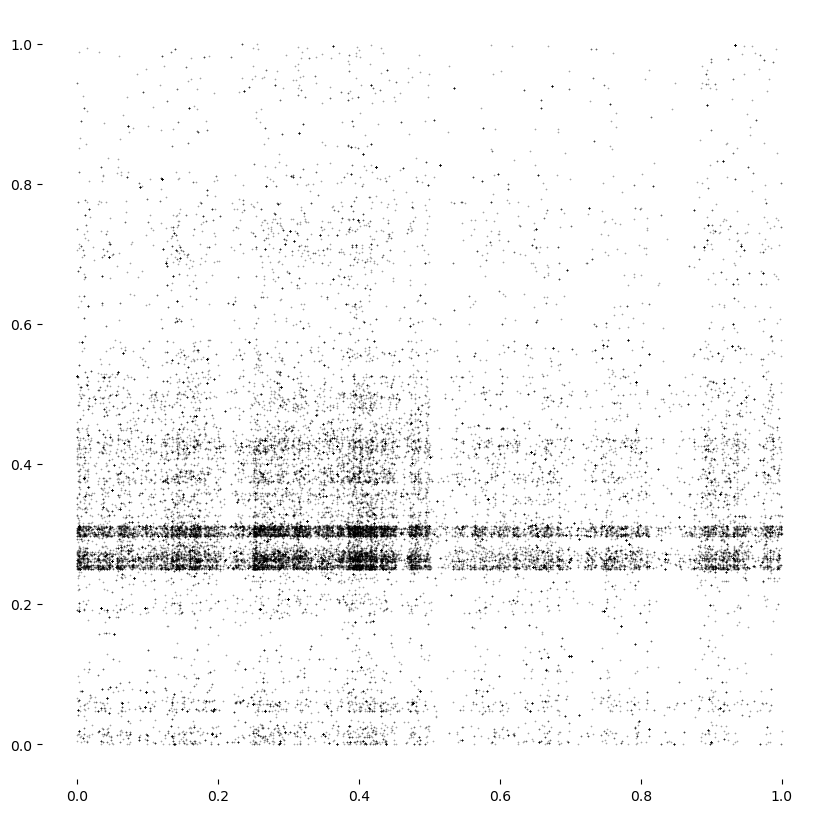

In [23]:
figure_maker(normal_plot)


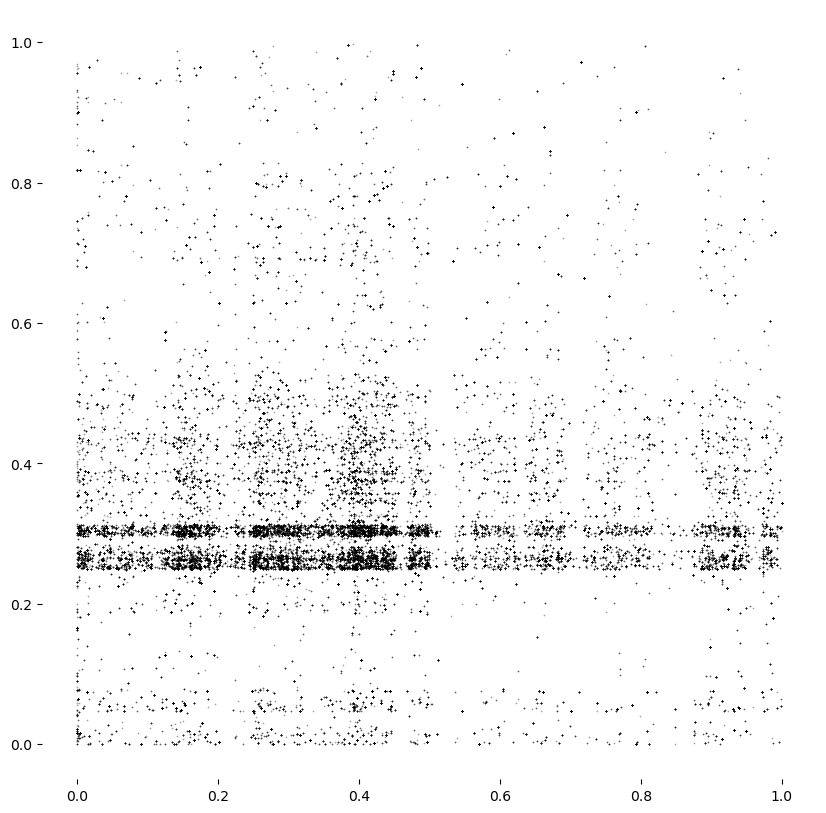

In [24]:
figure_maker(cancer_plot)

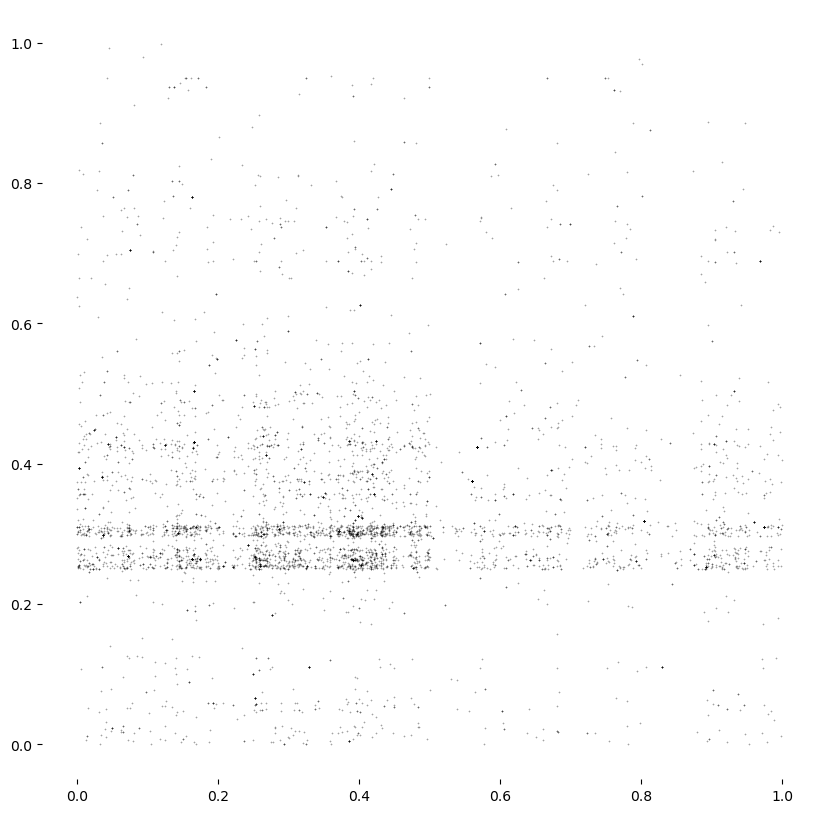

In [25]:
figure_maker(lab_plot)